# Classification using a CNN - Introduction

This notebook implements a **Convolutional Neural Network (CNN)** model for classifying images from the MNIST dataset using `TensorFlow` and `Keras`.

## 1 - Importing Libraries

In [39]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

sys.path.append('..')

## 2 - Loading and Preprocessing Data
Loading the MNIST dataset, reshaping images to fit the model’s input requirements, normalizing pixel values


In [40]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1,28,28,1) #28*28 pixel, 1 component
x_test = x_test.reshape(-1,28,28,1)

print("x_train :", x_train.shape)
print("y_train :", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)

x_train : (60000, 28, 28, 1)
y_train : (60000,)
x_test : (10000, 28, 28, 1)
y_test : (10000,)


In [41]:
print("before normalization : max={}, min={}".format(np.max(x_train), np.min(x_train)))

xmax = x_train.max()
x_train = x_train/xmax
x_test = x_test/xmax

print("after normalization : max={}, min={}".format(np.max(x_train), np.min(x_train)))

before normalization : max=255, min=0
after normalization : max=1.0, min=0.0


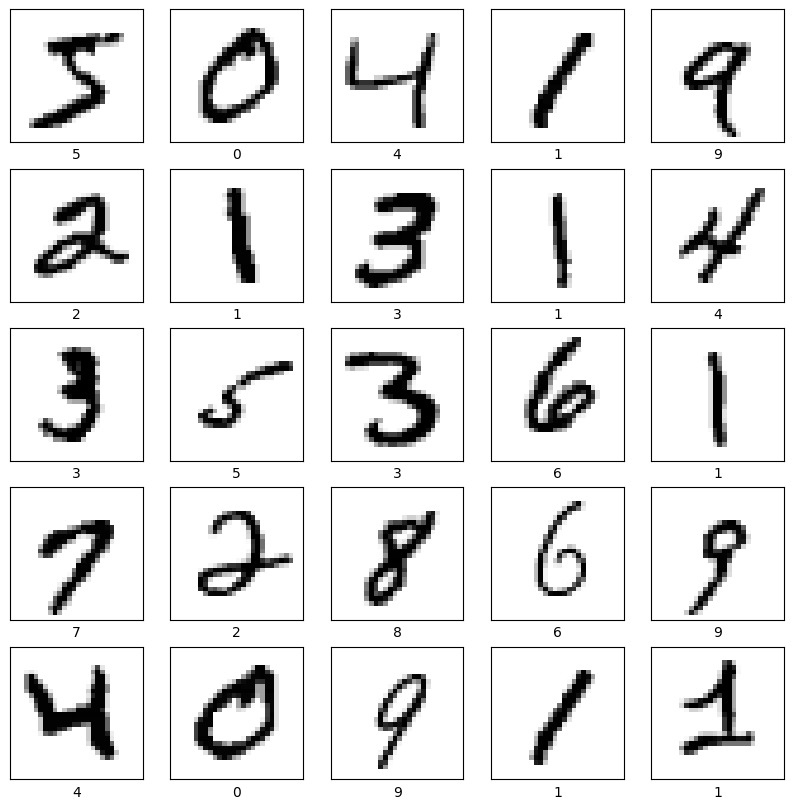

In [42]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

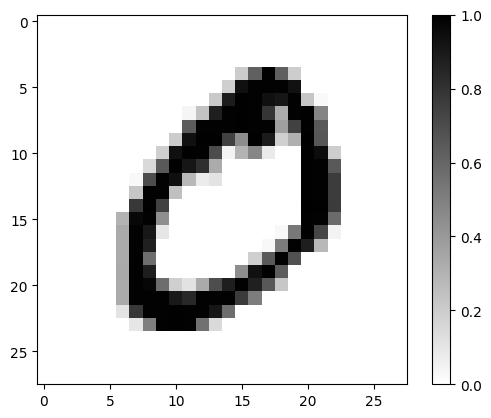

In [43]:
plt.figure()
plt.imshow(x_train[1].reshape(28,28), cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

## 3 - Building the CNN Model
Using Keras Sequential API, Adding convolutional and pooling layers, Flattening and dense layers for classification

In [44]:
model = keras.models.Sequential()

# first layer
model.add(keras.layers.Input((28,28,1))) #28*28 pixel, 1 dimension vector

# 8 convolutional layer
model.add(keras.layers.Conv2D(8, (3,3), activation='relu')) # kernel size 3*3, 8 filters

# pooling layer
model.add(keras.layers.MaxPooling2D((2,2))) # 2*2 pooling

# dropout layer
# only for training phase
# the dropout layer will randomly set 20% of the input units to 0 at each update during training time
# to prevent overfitting
# to prevent the model from relying too much on a particular neuron
model.add(keras.layers.Dropout(0.2))

# 16 convolutional layer
model.add(keras.layers.Conv2D(16, (3,3), activation='relu')) # kernel size 3*3, 16 filters
model.add(keras.layers.MaxPooling2D((2,2))) # 2*2 pooling
model.add(keras.layers.Dropout(0.2))

# flatten layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.5)) # 50% dropout, to optimize the dropout rate we can doo statistical analysis

model.add(keras.layers.Dense(10, activation='softmax')) # 10 classes
# softmax is used for multi-class classification

In [45]:
model.summary()
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        40,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

## 4 - Training the Model

Compiling the model with a loss function and optimizer, Training on the dataset


In [46]:
batch_size = 512
epochs = 16

history = model.fit(x_train, y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.4255 - loss: 1.6581 - val_accuracy: 0.9194 - val_loss: 0.2912
Epoch 2/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.8528 - loss: 0.4665 - val_accuracy: 0.9523 - val_loss: 0.1578
Epoch 3/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.9049 - loss: 0.3073 - val_accuracy: 0.9641 - val_loss: 0.1198
Epoch 4/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9244 - loss: 0.2488 - val_accuracy: 0.9694 - val_loss: 0.0988
Epoch 5/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9342 - loss: 0.2152 - val_accuracy: 0.9736 - val_loss: 0.0854
Epoch 6/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.9395 - loss: 0.1940 - val_accuracy: 0.9765 - val_loss: 0.0737
Epoch 7/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.9452 - loss: 0.1783 - val_accuracy: 0.9779 - val_loss: 0.0670
Epoch 8/16
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.9507 - loss: 0.1613 - val_accu

In [47]:
model.save("mnist_cnn_model.h5")

## 5 - Evaluating the Model

Computing accuracy and other metrics on the test set, Visualizing the results


### Final loss and accuracy

In [48]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss: {score[0]:4.4f}')
print(f'Test accuracy: {score[1]:4.4f}')

Test loss: 0.0412
Test accuracy: 0.9862


### Plot History

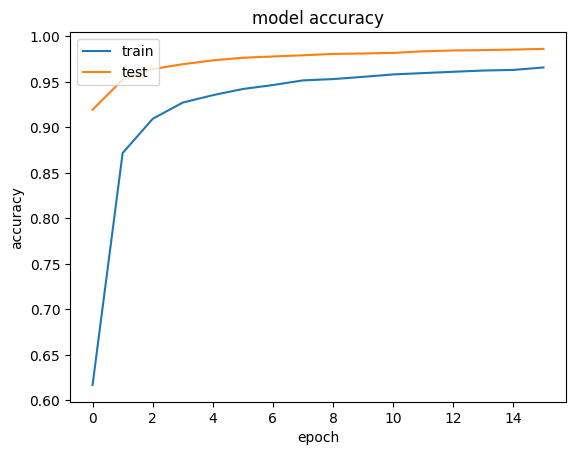

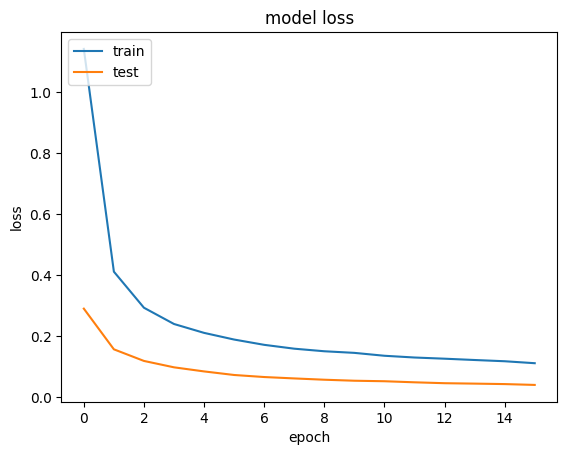

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 6 - Make Predictions on New Images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


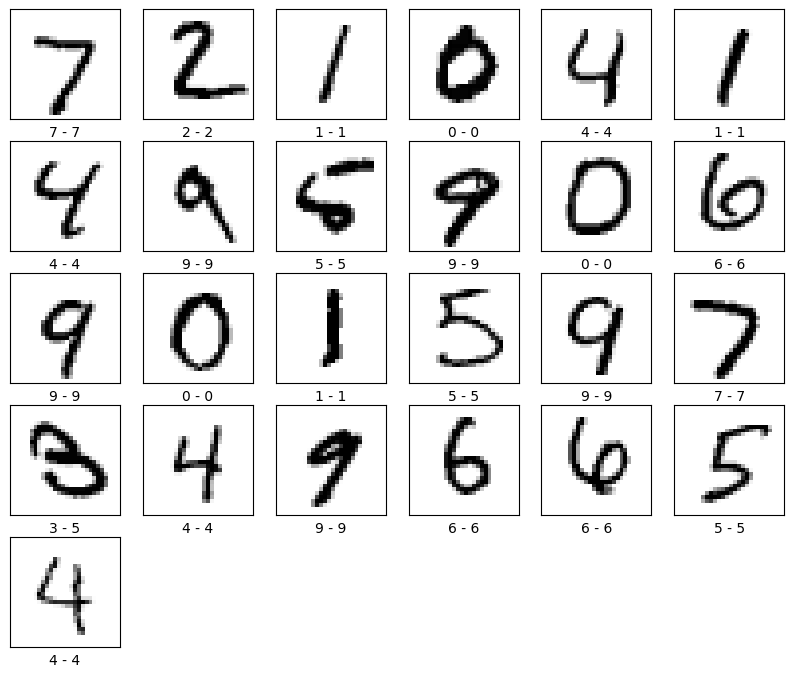

In [50]:
y_sigmoid = model.predict(x_test)
y_pred = np.argmax(y_sigmoid, axis=-1)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(f'{y_test[i]} - {y_pred[i]}')
plt.show()


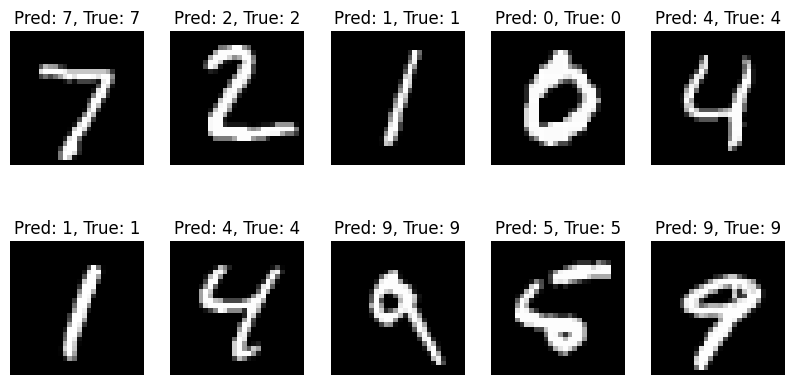

In [51]:
import matplotlib.pyplot as plt

# Function to display images with predictions
def display_predictions(images, labels, predictions, num_images=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape to 28x28 and plot
        plt.title(f"Pred: {predictions[i]}, True: {labels[i]}")
        plt.axis('off')
    plt.show()

# Call the function
display_predictions(x_test, y_test, y_pred, num_images=10)


### Plot some errors

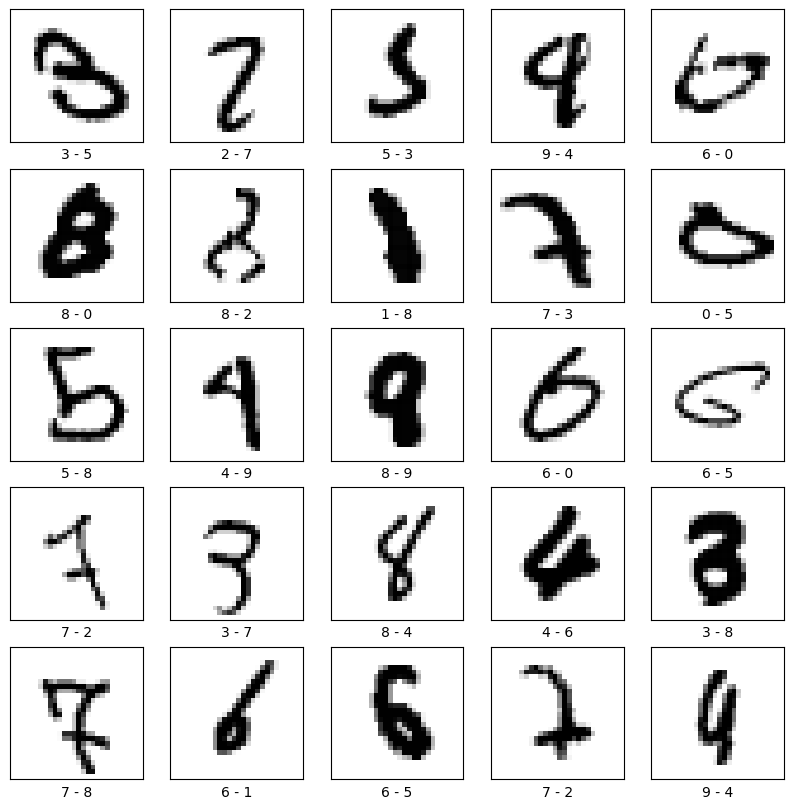

In [52]:
errors = [ i for i in range(len(y_test)) if y_test[i] != y_pred[i] ]
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[errors[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(f'{y_test[errors[i]]} - {y_pred[errors[i]]}')
plt.show()

### Confusion matrix

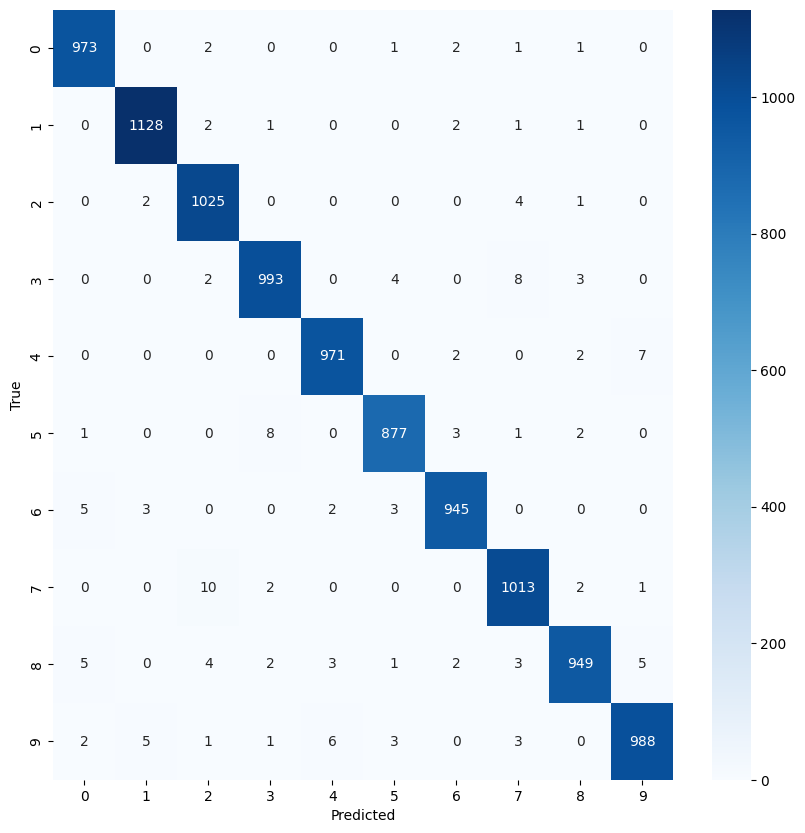

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [53]:
# confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# accuracy per class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
